<a href="https://colab.research.google.com/github/NK2108/Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Project by Aris Kalokuris and Nikolas Katsimpras!

In [1]:
import librosa
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [9]:
# run this cell if you want to redo the mfcc analysis and feeature creation
# you can skip this and load the ready data
#
# here we exract the mfcc information for 3.1 sec with 0.5 sec offset
file_emotion=[]
npdata=np.ndarray(shape=(0,224,20),dtype=float)
for smpl in (glob('drive/MyDrive/Samples/samples/*.wav')):  
  y, sr = librosa.load(smpl, offset=0.5,duration=2.6 )
  mfcc_np =librosa.feature.mfcc(y=y, sr=sr,n_fft =512,hop_length =256).T
  file_name=os.path.basename(smpl)
  emotion=emotions[file_name.split("-")[2]]
  if (mfcc_np.shape[0])!=224:
   npdat=np.zeros((224,20),float)
   npdat[:mfcc_np.shape[0],:mfcc_np.shape[1]] =mfcc_np
  else:
    npdat=mfcc_np
  npdat=np.reshape(npdat,(-1, 224,20))
  npdata=np.append(npdata,npdat,axis=0)
  file_emotion.append(emotion)
#print(npdata.shape)
#print(npdata[299])
np.save(os.path.join('drive/MyDrive/Deep Learning', 'npdata'), npdata)
np.save(os.path.join('drive/MyDrive/Deep Learning', 'file_emotion'), file_emotion)

In [10]:
# load the prepared data
npdata=np.load('drive/MyDrive/Deep Learning/npdata.npy')
file_emotion=np.load('drive/MyDrive/Deep Learning/file_emotion.npy')

# New Section

In [11]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D
from sklearn.preprocessing import StandardScaler, OneHotEncoder
model_001=Sequential()


In [12]:
from keras.layers import Activation
from keras.regularizers import l2

In [ ]:
model_001.add(Conv2D(32, (3,3),input_shape=(224,20,1),strides=(1,1), padding='same', activation='relu'))
model_001.add(MaxPooling2D(pool_size=(2,2)))
model_001.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_001.add(MaxPooling2D(pool_size=(2,2)))
model_001.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_001.add(MaxPooling2D(pool_size=(2,2)))
model_001.add(Flatten())
#model_001.add(Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_001.add(Dense(64))
#model_001.add(Dropout(0.2 ))
model_001.add(Activation('relu'))
model_001.add(Dense(units=8, activation='softmax'))
model_001.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_001.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 20, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 10, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 10, 32)       9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 5, 32)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 5, 32)         9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 2, 32)       

In [13]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(file_emotion).reshape(-1,1)).toarray()

In [14]:
##remove # to resplit the train data and retrain the model
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(npdata,Y , random_state=6, shuffle=True)
#
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'x_train'), x_train)
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'y_train'), y_train)
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'x_test'), x_test)
#np.save(os.path.join('drive/MyDrive/Deep Learning', 'y_test'), y_test)

x_train=np.load('drive/MyDrive/Deep Learning/x_train.npy')
y_train=np.load('drive/MyDrive/Deep Learning/y_train.npy')
x_test=np.load('drive/MyDrive/Deep Learning/x_test.npy')
y_test=np.load('drive/MyDrive/Deep Learning/y_test.npy')


In [15]:
len( x_train),len(  y_train),len(  x_test),len(  y_test)

(1082, 1082, 361, 361)

In [16]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [23]:
#
# Run this cell if you want to retrain the model / or you have resplit the data

eps=100
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=3, min_lr=0.0000001)

history001=model_001.fit(x_train, y_train, batch_size=64, epochs=eps, validation_data=(x_test, y_test))

## or run the 

Epoch 1/100
17/17 [==============================] - 7s 369ms/step - loss: 1.1734 - accuracy: 0.7477 - val_loss: 2.5564 - val_accuracy: 0.5374
Epoch 2/100
17/17 [==============================] - 6s 369ms/step - loss: 0.2325 - accuracy: 0.9187 - val_loss: 2.4162 - val_accuracy: 0.5374
Epoch 3/100
17/17 [==============================] - 6s 363ms/step - loss: 0.0372 - accuracy: 0.9926 - val_loss: 2.7270 - val_accuracy: 0.5235
Epoch 4/100
17/17 [==============================] - 6s 360ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 2.5371 - val_accuracy: 0.5374
Epoch 5/100
17/17 [==============================] - 6s 357ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 2.5509 - val_accuracy: 0.5485
Epoch 6/100
17/17 [==============================] - 6s 358ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.5873 - val_accuracy: 0.5485
Epoch 7/100
17/17 [==============================] - 6s 359ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 2.6234 - val_accuracy: 0.5512

In [ ]:
model_001.save("drive/MyDrive/Deep Learning/speech_model_CNN_001.tf", save_format='tf')

In [ ]:
# if we want to skip 2 precious cells and loaded trained model
import tensorflow as tf
model_001 = tf.keras.models.load_model('drive/MyDrive/Deep Learning/speech_model_CNN_001.tf')

12/12 [==============================] - 1s 64ms/step - loss: 3.5117 - accuracy: 0.5457
Accuracy of our model on test data :  54.57063913345337 %


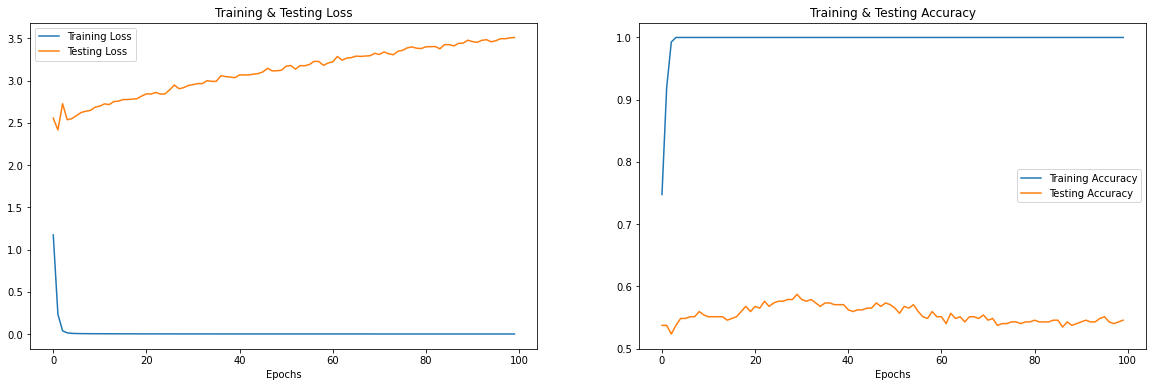

In [24]:
print("Accuracy of our model on test data : " , model_001.evaluate(x_test,y_test)[1]*100 , "%")
epochs = [i for i in range(eps)]
fig , ax = plt.subplots(1,2)
train_acc = history001.history['accuracy']
train_loss = history001.history['loss']
test_acc = history001.history['val_accuracy']
test_loss = history001.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [31]:
# saving our results

import pickle
with open("drive/MyDrive/Deep Learning/History001", 'wb') as file_h:
        pickle.dump(history001.history, file_h)
history001= pickle.load(open("drive/MyDrive/Deep Learning/History001", "rb"))
#history = pickle.load(open('/trainHistoryDict'), "rb"




INFO:tensorflow:Assets written to: drive/MyDrive/Deep Learning/speech_model_CNN_001.tf/assets


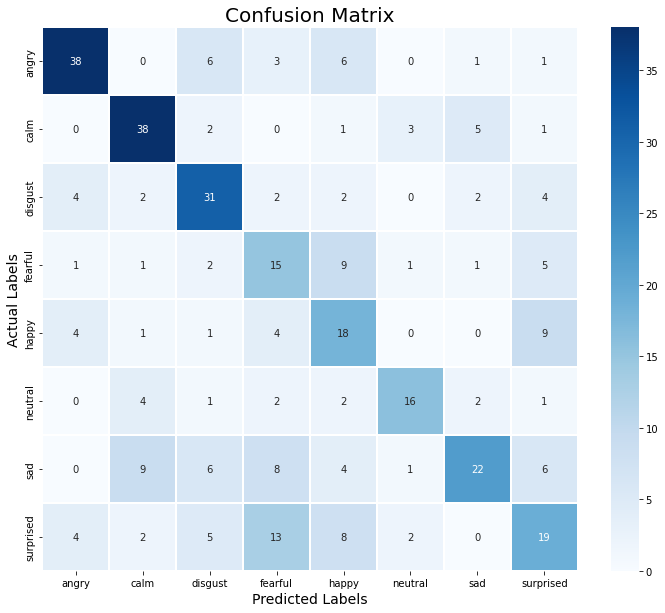

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# predicting on test data.
pred_test = model_001.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [35]:
model_002=Sequential()
model_002.add(Conv2D(32, (3,3),input_shape=(224,20,1),strides=(1,1), padding='same', activation='relu'))
model_002.add(MaxPooling2D(pool_size=(2,2)))
model_002.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_002.add(MaxPooling2D(pool_size=(2,2)))
model_002.add(Flatten())
model_002.add(Dense(64))
model_002.add(Activation('relu'))
model_002.add(Dense(units=8, activation='softmax'))
model_002.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_002.summary()
#Accuracy of our model on test data :  52.63158082962036 %





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 20, 32)       320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 10, 32)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 10, 32)       9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 5, 32)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8960)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [36]:
history002=model_002.fit(x_train, y_train, batch_size=64, epochs=60, validation_data=(x_test, y_test))



Epoch 1/60
17/17 [==============================] - 6s 331ms/step - loss: 35.0989 - accuracy: 0.1257 - val_loss: 3.2843 - val_accuracy: 0.2078
Epoch 2/60
17/17 [==============================] - 6s 351ms/step - loss: 2.3462 - accuracy: 0.1867 - val_loss: 2.0617 - val_accuracy: 0.1856
Epoch 3/60
17/17 [==============================] - 5s 316ms/step - loss: 1.9680 - accuracy: 0.2366 - val_loss: 1.9859 - val_accuracy: 0.1967
Epoch 4/60
17/17 [==============================] - 7s 404ms/step - loss: 1.7043 - accuracy: 0.3586 - val_loss: 1.7483 - val_accuracy: 0.3435
Epoch 5/60
17/17 [==============================] - 9s 558ms/step - loss: 1.3576 - accuracy: 0.5305 - val_loss: 1.5673 - val_accuracy: 0.4626
Epoch 6/60
17/17 [==============================] - 5s 320ms/step - loss: 1.0476 - accuracy: 0.6349 - val_loss: 1.5602 - val_accuracy: 0.4543
Epoch 7/60
17/17 [==============================] - 5s 319ms/step - loss: 0.7657 - accuracy: 0.7403 - val_loss: 1.7094 - val_accuracy: 0.4709
Epoch

In [37]:
model_002.save("drive/MyDrive/Deep Learning/speech_model_CNN_002.tf", save_format='tf')

INFO:tensorflow:Assets written to: drive/MyDrive/Deep Learning/speech_model_CNN_002.tf/assets


In [ ]:
# if we want to skip 2 precious cells and load trained model
model_002 = tf.keras.models.load_model('drive/MyDrive/Deep Learning/speech_model_CNN_002.tf')

12/12 [==============================] - 0s 39ms/step - loss: 2.5934 - accuracy: 0.5762
Accuracy of our model on test data :  57.617729902267456 %


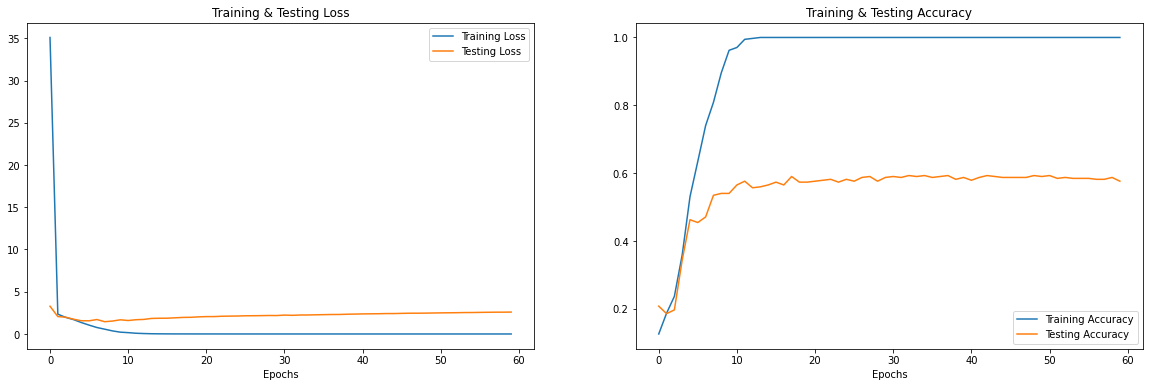

In [38]:
eps=60
print("Accuracy of our model on test data : " , model_002.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(eps)]
fig , ax = plt.subplots(1,2)
train_acc_002 = history002.history['accuracy']
train_loss_002 = history002.history['loss']
test_acc_002 = history002.history['val_accuracy']
test_loss_002 = history002.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_002 , label = 'Training Loss')
ax[0].plot(epochs , test_loss_002 , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_002 , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_002 , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [39]:
# saving our results

import pickle
with open("drive/MyDrive/Deep Learning/History002", 'wb') as file_h:
        pickle.dump(history002.history, file_h)
history002= pickle.load(open("drive/MyDrive/Deep Learning/History002", "rb"))
#history = pickle.load(open('/trainHistoryDict'), "rb"

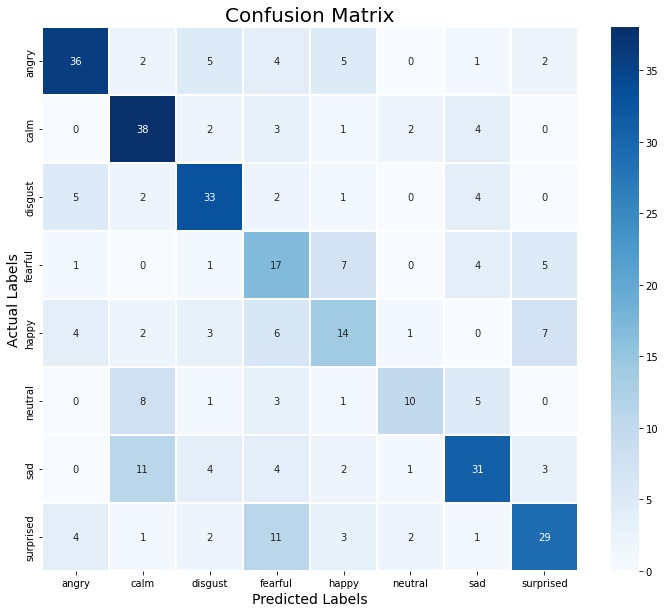

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# predicting on test data.
pred_test = model_002.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [40]:
model_003=Sequential()
model_003.add(Conv2D(32, (3,3),input_shape=(224,20,1),strides=(1,1), padding='same', activation='relu'))
model_003.add(MaxPooling2D(pool_size=(2,2)))
model_003.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_003.add(MaxPooling2D(pool_size=(2,2)))
model_003.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_003.add(MaxPooling2D(pool_size=(2,2)))
model_003.add(Flatten())
model_003.add(Dense(64))
model_003.add(Activation('relu'))
model_003.add(Dense(units=8, activation='softmax'))
model_003.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_003.summary()
#Accuracy of our model on test data :  52.63158082962036 %





Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 20, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 10, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 10, 32)       9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 5, 32)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 5, 64)         18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 2, 64)       

In [41]:
history003=model_003.fit(x_train, y_train, batch_size=64, epochs=60, validation_data=(x_test, y_test))


Epoch 1/60
17/17 [==============================] - 7s 386ms/step - loss: 21.5625 - accuracy: 0.1534 - val_loss: 3.3853 - val_accuracy: 0.1385
Epoch 2/60
17/17 [==============================] - 6s 378ms/step - loss: 2.2128 - accuracy: 0.1950 - val_loss: 2.0363 - val_accuracy: 0.2105
Epoch 3/60
17/17 [==============================] - 6s 373ms/step - loss: 1.8614 - accuracy: 0.2957 - val_loss: 1.8018 - val_accuracy: 0.3324
Epoch 4/60
17/17 [==============================] - 7s 394ms/step - loss: 1.6657 - accuracy: 0.3660 - val_loss: 1.6835 - val_accuracy: 0.3657
Epoch 5/60
17/17 [==============================] - 6s 377ms/step - loss: 1.4949 - accuracy: 0.4372 - val_loss: 1.5832 - val_accuracy: 0.4072
Epoch 6/60
17/17 [==============================] - 6s 378ms/step - loss: 1.4148 - accuracy: 0.4797 - val_loss: 1.4839 - val_accuracy: 0.4543
Epoch 7/60
17/17 [==============================] - 6s 379ms/step - loss: 1.2765 - accuracy: 0.5231 - val_loss: 1.4822 - val_accuracy: 0.4377
Epoch

In [42]:
model_003.save("drive/MyDrive/Deep Learning/speech_model_CNN_003.tf", save_format='tf')

INFO:tensorflow:Assets written to: drive/MyDrive/Deep Learning/speech_model_CNN_003.tf/assets


In [ ]:
# if we want to skip 2 precious cells and loaded trained model
model_003 = tf.keras.models.load_model('drive/MyDrive/Deep Learning/speech_model_CNN_003.tf')

12/12 [==============================] - 1s 48ms/step - loss: 2.0904 - accuracy: 0.6288
Accuracy of our model on test data :  62.8808856010437 %


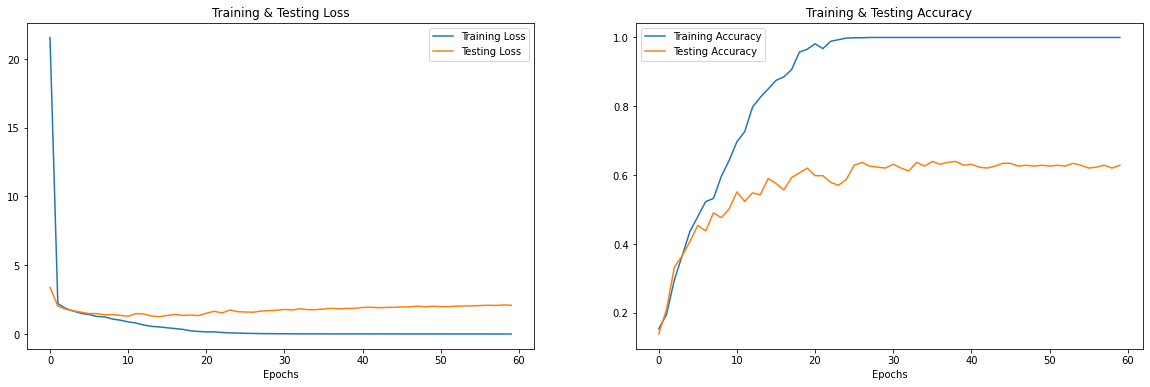

In [43]:
eps=60
print("Accuracy of our model on test data : " , model_003.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(eps)]
fig , ax = plt.subplots(1,2)
train_acc_003 = history003.history['accuracy']
train_loss_003 = history003.history['loss']
test_acc_003 = history003.history['val_accuracy']
test_loss_003 = history003.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_003 , label = 'Training Loss')
ax[0].plot(epochs , test_loss_003 , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_003 , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_003 , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# saving our results

import pickle
with open("drive/MyDrive/Deep Learning/History003", 'wb') as file_h:
        pickle.dump(history003.history, file_h)
history003= pickle.load(open("drive/MyDrive/Deep Learning/History003", "rb"))
#history = pickle.load(open('/trainHistoryDict'), "rb"

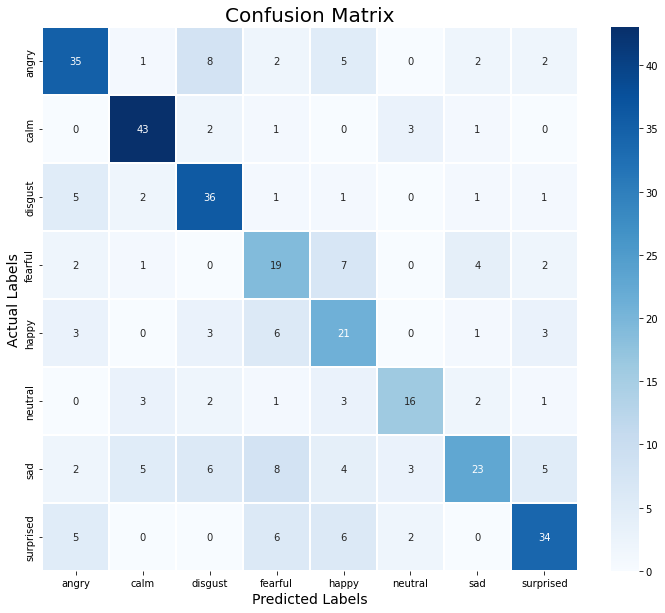

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# predicting on test data.
pred_test = model_003.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [47]:
model_004=Sequential()
model_004.add(Conv2D(32, (3,3),input_shape=(224,20,1),strides=(1,1), padding='same', activation='relu'))
model_004.add(MaxPooling2D(pool_size=(2,2)))
model_004.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_004.add(MaxPooling2D(pool_size=(2,2)))
model_004.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_004.add(MaxPooling2D(pool_size=(2,2)))
model_004.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_004.add(MaxPooling2D(pool_size=(2,2)))
model_004.add(Flatten())
model_004.add(Dense(64))
model_004.add(Activation('relu'))
model_004.add(Dense(units=8, activation='softmax'))
model_004.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_004.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 20, 32)       320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 10, 32)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 10, 64)       18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 5, 64)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 5, 64)         36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 28, 2, 64)       

In [48]:
history004=model_004.fit(x_train, y_train, batch_size=64, epochs=60, validation_data=(x_test, y_test))


Epoch 1/60
17/17 [==============================] - 10s 569ms/step - loss: 13.9572 - accuracy: 0.1303 - val_loss: 3.8456 - val_accuracy: 0.1524
Epoch 2/60
17/17 [==============================] - 9s 550ms/step - loss: 2.3479 - accuracy: 0.1830 - val_loss: 2.0428 - val_accuracy: 0.2188
Epoch 3/60
17/17 [==============================] - 9s 551ms/step - loss: 1.8804 - accuracy: 0.2884 - val_loss: 1.7976 - val_accuracy: 0.3269
Epoch 4/60
17/17 [==============================] - 10s 599ms/step - loss: 1.7769 - accuracy: 0.3161 - val_loss: 1.7438 - val_accuracy: 0.3601
Epoch 5/60
17/17 [==============================] - 11s 619ms/step - loss: 1.6493 - accuracy: 0.3623 - val_loss: 1.6716 - val_accuracy: 0.3463
Epoch 6/60
17/17 [==============================] - 9s 550ms/step - loss: 1.5661 - accuracy: 0.4020 - val_loss: 1.7043 - val_accuracy: 0.3380
Epoch 7/60
17/17 [==============================] - 10s 619ms/step - loss: 1.5142 - accuracy: 0.4196 - val_loss: 1.5251 - val_accuracy: 0.3878
E

In [49]:
model_004.save("drive/MyDrive/Deep Learning/speech_model_CNN_004.tf", save_format='tf')

INFO:tensorflow:Assets written to: drive/MyDrive/Deep Learning/speech_model_CNN_004.tf/assets


In [ ]:
# if we want to skip 2 precious cells and load trained model
model_004 = tf.keras.models.load_model('drive/MyDrive/Deep Learning/speech_model_CNN_004.tf')

12/12 [==============================] - 1s 67ms/step - loss: 1.9235 - accuracy: 0.6427
Accuracy of our model on test data :  64.26593065261841 %


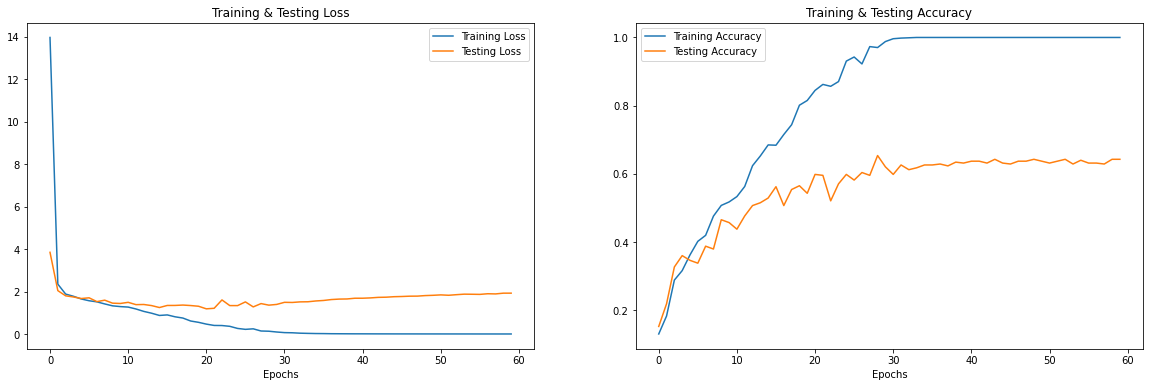

In [50]:
print("Accuracy of our model on test data : " , model_004.evaluate(x_test,y_test)[1]*100 , "%")
epochs = [i for i in range(eps)]
fig , ax = plt.subplots(1,2)
train_acc_004 = history004.history['accuracy']
train_loss_004 = history004.history['loss']
test_acc_004 = history004.history['val_accuracy']
test_loss_004 = history004.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_004 , label = 'Training Loss')
ax[0].plot(epochs , test_loss_004 , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_004 , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_004 , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

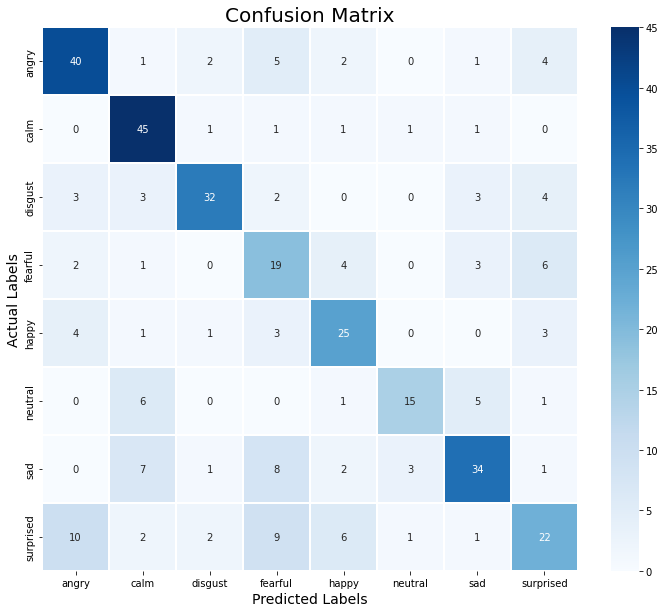

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# predicting on test data.
pred_test = model_004.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()